In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:

# 📌 Fiziksel Parametreler (Alüminyum)
L = 1             # [m] malzeme kalınlığı
T_max = 3600.0        # [s] maksimum zaman
alpha = 9.75e-5     # [m^2/s] ısıl difüzyon katsayısı (Alüminyum)
k = 237.0           # [W/(m·K)] ısı iletkenliği (Alüminyum)
q0 = 5000.0         # [W/m^2] sabit ısı akısı
T0 = 0.0            # [°C] başlangıç sıcaklığı

# 📌 Grid Parametreleri
Nx = 1001           # x boyunca nokta sayısı
Nt = 3601            # t boyunca nokta sayısı
x_vals = np.linspace(0, L, Nx)
t_vals = np.linspace(0, T_max, Nt)
X_grid, T_grid = np.meshgrid(x_vals, t_vals)

# ✅ Toleranslı Seri Fonksiyonu (Kitaptaki denklemle)
def T_custom_toleranced(x, t, T0, q0, k, alpha, L, N_terms=1000, tol=1e-6, verbose=False):
    result = T0 + (alpha * q0 * t) / (k * L)
    for n in range(1, N_terms + 1):
        gamma_n = (2*n - 1) * np.pi / (2 * L)
        coeff = np.cos(gamma_n * x) * (1 - np.exp(-alpha * gamma_n**2 * t)) / (gamma_n**2)
        term = (2 * q0 / (k * L)) * coeff
        result += term
        if np.max(np.abs(term)) < tol:
            if verbose:
                print(f"Term {n} altında tolerans ({tol}) → durdu.")
            break
    return result

# ✅ Sıcaklık Hesapla
T_values = T_custom_toleranced(X_grid, T_grid, T0, q0, k, alpha, L, N_terms=1000, tol=1e-5)

# ✅ Veri Setini Oluştur
data = pd.DataFrame({
    'x': X_grid.ravel(),
    't': T_grid.ravel(),
    'T': T_values.ravel()
})
data_sampled = data.sample(n=5000, random_state=42)  # örn. %1.5'lik rastgele örnek


# ✅ Veri önizleme
print(data.head())
print(f"\nToplam veri noktası: {len(data)} (Şekil: {Nt} zaman × {Nx} konum)")

       x    t    T
0  0.000  0.0  0.0
1  0.001  0.0  0.0
2  0.002  0.0  0.0
3  0.003  0.0  0.0
4  0.004  0.0  0.0

Toplam veri noktası: 3604601 (Şekil: 3601 zaman × 1001 konum)


In [9]:
data_sampled , data

(             x       t          T
 958394   0.437   957.0   3.453235
 506798   0.292   506.0   2.301271
 1631367  0.738  1629.0   4.308076
 117121   0.004   117.0   2.700479
 2935463  0.531  2932.0  10.253374
 ...        ...     ...        ...
 771783   0.012   771.0   7.862636
 1835119  0.286  1833.0   8.914747
 2974427  0.456  2971.0  11.278370
 3298473  0.178  3295.0  16.678826
 2154385  0.233  2152.0  11.084759
 
 [5000 rows x 3 columns],
              x       t         T
 0        0.000     0.0  0.000000
 1        0.001     0.0  0.000000
 2        0.002     0.0  0.000000
 3        0.003     0.0  0.000000
 4        0.004     0.0  0.000000
 ...        ...     ...       ...
 3604596  0.996  3600.0  7.444279
 3604597  0.997  3600.0  7.434471
 3604598  0.998  3600.0  7.424664
 3604599  0.999  3600.0  7.414870
 3604600  1.000  3600.0  7.405063
 
 [3604601 rows x 3 columns])

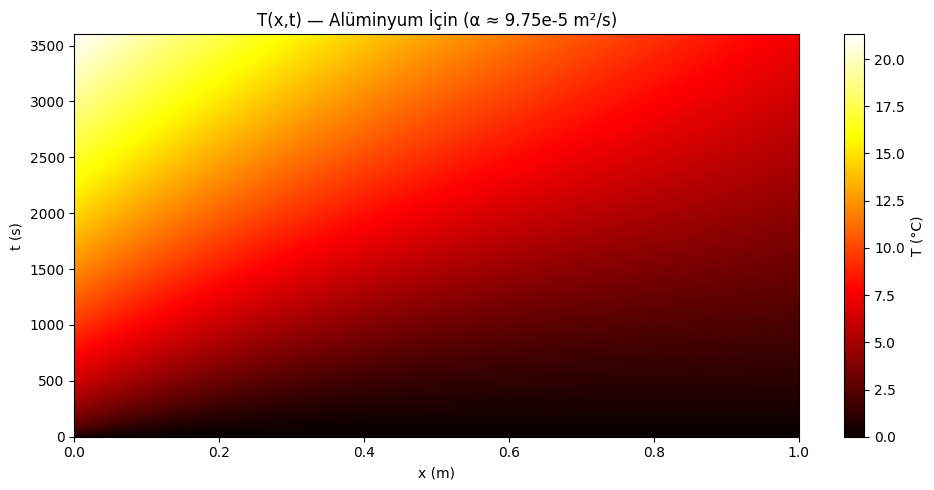

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(T_values, extent=[0, L, 0, T_max], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='T (°C)')
plt.xlabel("x (m)")
plt.ylabel("t (s)")
plt.title("T(x,t) — Alüminyum İçin (α ≈ 9.75e-5 m²/s)")
plt.tight_layout()
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


KeyboardInterrupt: 

In [12]:
data.to_csv('/content/drive/MyDrive/PINN/data.csv', index=False)

data_sampled.to_csv('/content/drive/MyDrive/PINN/data_sampled.csv', index=False)